In [3]:
import re
import string
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import os
import nltk
import spacy
import random
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/twitter-without-punc/train_twitter_no_punc.csv
/kaggle/input/twitter-without-punc/test_twitter_no_punc.csv
/kaggle/input/twitter-data/newData.csv


In [4]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [5]:
test =pd.read_csv("../input/twitter-without-punc/test_twitter_no_punc.csv")
train =pd.read_csv("../input/twitter-without-punc/train_twitter_no_punc.csv") 
test = test.rename(columns={'0': 'description','1':'category'})
frames = [train, test]
df = pd.concat(frames)
df.reset_index(drop=True)

,description,category
0,she say she like me cuz ima real man no l...,5
1,babygirl as jiggling dropping it low doing the...,1
2,my only talent is being able to do both the uw...,2
3,sobie ade buat postage rini pat pat jom all re...,2
4,i should make a video on that can it be top nu...,1
...,...,...
142179,wishing everyone a prosperous month of april y...,6
142180,did my in the first few day in avoidance of ju...,1
142181,wauw i am taking your name off the list if u g...,3
142182,that dream was wild i don t think i ll ever re...,7


In [15]:
# emoji_to_idx = {'✅': 0, '✨': 1, '🌚': 2, '🎉': 3, '🎶': 4, '👀': 5, '👇': 6, '👌': 7, '👍': 8, '👏': 9, '👑': 10, '💀': 11, '💔': 12, '💕': 13, '💖': 14, '💗': 15, '💙': 16,\
#                     '💚': 17, '💛': 18, '💜': 19, '💞': 20, '💪': 21, '💯': 22, '🔥': 23, '😀': 24, '😁': 25, '😂': 26, '😃': 27, '😄': 28, '😅': 29, '😆': 30, '😇': 31, '😈': 32,\
#                     '😉': 33, '😊': 34, '😋': 35, '😌': 36, '😍': 37, '😎': 38, '😏': 39, '😐': 40, '😑': 41, '😒': 42, '😔': 43, '😕': 44, '😘': 45, '😜': 46, '😝': 47, '😞': 48,\
#                     '😡': 49, '😢': 50, '😣': 51, '😤': 52, '😩': 53, '😪': 54, '😫': 55, '😬': 56, '😭': 57, '😱': 58, '😳': 59, '😴': 60, '🙈': 61, '🙌': 62, '🙏': 63}
# d_swap = {v: k for k, v in emoji_to_idx.items()}
# df['label_to_emoji'] = df['label_int'].map(d_swap)

In [ ]:
# happy = ['😊','😉','😀','😃','🌚','😇','🎉','😅','😆','😎','😏','😈','😋','😜','😝','😌','😂','😁','😄']
# love  = ['💕','💖','💗','💙','💛','💜','💚','💞','😍','😘']
# anger = ['😡','😤','😑','😒']
# sad = ['😣','😩','😪','😫','😔','😞','😢','💔','😭','😕']
# reaction = ['✅','💯','🔥','👍','👏','👌','👀','💪','🙏','🙌','🙈']
# misc = ['✨','🎶','👇','👑','💀']
# various = ['😬','😱','😳','😴','😐']

In [142]:
# stopwords = nltk.corpus.stopwords.words('english')
# newStopWords = ['url', 'email', 'percent', 'money', 'phone','user','time','date', 'number']
# stopwords.extend(newStopWords)
# stopwords = set(stopwords) - set(['not','no','nor'])
# df['temp_list'] = df['description'].apply(lambda x:str(x).split())
# def remove_stopword(x):
#     return [y for y in x if y not in stopwords]
# df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))

In [6]:
df

,description,category
0,she say she like me cuz ima real man no l...,5
1,babygirl as jiggling dropping it low doing the...,1
2,my only talent is being able to do both the uw...,2
3,sobie ade buat postage rini pat pat jom all re...,2
4,i should make a video on that can it be top nu...,1
...,...,...
21323,wishing everyone a prosperous month of april y...,6
21324,did my in the first few day in avoidance of ju...,1
21325,wauw i am taking your name off the list if u g...,3
21326,that dream was wild i don t think i ll ever re...,7


In [144]:
# df['Num_words_text'] = df['description'].apply(lambda x:len(str(x).split())) 
# df['Num_words_temp_list'] = df['temp_list'].apply(lambda x:len(x)) 
# df = df[df['Num_words_temp_list']>6]
# df = df.reset_index(drop=True)

In [145]:
# df

,description,category,temp_list,Num_words_text,Num_words_temp_list
0,she say she like me cuz ima real man no l...,5,"[say, like, cuz, ima, real, man, no, lie, told...",14,11
1,babygirl as jiggling dropping it low doing the...,1,"[babygirl, jiggling, dropping, low, damn, cryb...",17,9
2,sobie ade buat postage rini pat pat jom all re...,2,"[sobie, ade, buat, postage, rini, pat, pat, jo...",11,10
3,yeah i m still trying to understand what the h...,6,"[yeah, still, trying, understand, hell, simula...",16,7
4,politics ha no place in professional sports p...,3,"[politics, ha, no, place, professional, sports...",17,12
...,...,...,...,...,...
91720,clyde describing fan who remember knicks trevo...,1,"[clyde, describing, fan, remember, knicks, tre...",16,12
91721,wishing everyone a prosperous month of april y...,6,"[wishing, everyone, prosperous, month, april, ...",12,7
91722,did my in the first few day in avoidance of ju...,1,"[first, day, avoidance, justification, writing...",22,9
91723,wauw i am taking your name off the list if u g...,3,"[wauw, taking, name, list, u, gonna, dat]",16,7


In [7]:
temp = df.groupby('category').count()['description'].reset_index().sort_values(by='description',ascending=False)
temp.style.background_gradient(cmap='Purples')
fig = go.Figure(go.Funnelarea(
    text =temp.category,
    values = temp.description,
    title = {"position": "top center", "text": "Funnel-Chart of Class Distribution"}
    ))
fig.show()

In [147]:
# top = Counter([item for sublist in df['temp_list'] for item in sublist])
# temp = pd.DataFrame(top.most_common(20))
# temp.columns = ['Common_words','count']
# fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
# fig.show()

In [148]:
# happy -> 1
# love -> 2
# anger -> 3
# sad -> 4
# reaction -> 5
# misc -> 6
# various -> 7

In [149]:
# happy = df[df['category']==1]
# love = df[df['category']==2]
# anger = df[df['category']==3]
# sad = df[df['category']==4]
# reaction = df[df['category']==5]
# misc = df[df['category']==6]
# various = df[df['category']==7]

In [150]:
# #MosT common positive words
# top = Counter([item for sublist in happy['temp_list'] for item in sublist])
# temp_happy = pd.DataFrame(top.most_common(20))
# temp_happy.columns = ['Common_words','count']
# temp_happy.style.background_gradient(cmap='Greens')
# fig = px.bar(temp_happy, x="count", y="Common_words", title='Most Commmon Happy Words', orientation='h', 
#              width=700, height=700,color='Common_words')
# fig.show()

In [151]:
# #MosT common positive words
# top = Counter([item for sublist in love['temp_list'] for item in sublist])
# temp_love = pd.DataFrame(top.most_common(20))
# temp_love.columns = ['Common_words','count']
# temp_love.style.background_gradient(cmap='Greens')
# fig = px.bar(temp_love, x="count", y="Common_words", title='Most Commmon Love Words', orientation='h', 
#              width=700, height=700,color='Common_words')
# fig.show()

In [152]:
# #MosT common positive words
# top = Counter([item for sublist in anger['temp_list'] for item in sublist])
# temp_anger = pd.DataFrame(top.most_common(20))
# temp_anger.columns = ['Common_words','count']
# temp_anger.style.background_gradient(cmap='Greens')
# fig = px.bar(temp_anger, x="count", y="Common_words", title='Most Commmon Anger Words', orientation='h', 
#              width=700, height=700,color='Common_words')
# fig.show()

In [153]:
# #MosT common positive words
# top = Counter([item for sublist in sad['temp_list'] for item in sublist])
# temp_sad = pd.DataFrame(top.most_common(20))
# temp_sad.columns = ['Common_words','count']
# temp_sad.style.background_gradient(cmap='Greens')
# fig = px.bar(temp_sad, x="count", y="Common_words", title='Most Common Sad Words', orientation='h', 
#              width=700, height=700,color='Common_words')
# fig.show()

In [154]:
# #MosT common positive words
# top = Counter([item for sublist in reaction['temp_list'] for item in sublist])
# temp_reaction = pd.DataFrame(top.most_common(20))
# temp_reaction.columns = ['Common_words','count']
# temp_reaction.style.background_gradient(cmap='Greens')
# fig = px.bar(temp_reaction, x="count", y="Common_words", title='Most Commmon Reaction Words', orientation='h', 
#              width=700, height=700,color='Common_words')
# fig.show()

In [155]:
# #MosT common positive words
# top = Counter([item for sublist in misc['temp_list'] for item in sublist])
# temp_misc = pd.DataFrame(top.most_common(20))
# temp_misc.columns = ['Common_words','count']
# temp_misc.style.background_gradient(cmap='Greens')
# fig = px.bar(temp_misc, x="count", y="Common_words", title='Most Commmon Misc Words', orientation='h', 
#              width=700, height=700,color='Common_words')
# fig.show()

In [156]:
# #MosT common positive words
# top = Counter([item for sublist in various['temp_list'] for item in sublist])
# temp_various = pd.DataFrame(top.most_common(20))
# temp_various.columns = ['Common_words','count']
# temp_various.style.background_gradient(cmap='Greens')
# fig = px.bar(temp_various, x="count", y="Common_words", title='Most Commmon Various Words', orientation='h', 
#              width=700, height=700,color='Common_words')
# fig.show()

In [157]:
# def to_sentence(list):
#     return ' '.join(list);
# df['temp_list']  = df['temp_list'].map(to_sentence)
# df = df.rename(columns={'temp_list': 'temp'})

In [158]:
# df

,description,category,temp,Num_words_text,Num_words_temp_list
0,she say she like me cuz ima real man no l...,5,say like cuz ima real man no lie told real life,14,11
1,babygirl as jiggling dropping it low doing the...,1,babygirl jiggling dropping low damn crybaby se...,17,9
2,sobie ade buat postage rini pat pat jom all re...,2,sobie ade buat postage rini pat pat jom ready ...,11,10
3,yeah i m still trying to understand what the h...,6,yeah still trying understand hell simulation g...,16,7
4,politics ha no place in professional sports p...,3,politics ha no place professional sports perio...,17,12
...,...,...,...,...,...
91720,clyde describing fan who remember knicks trevo...,1,clyde describing fan remember knicks trevor ar...,16,12
91721,wishing everyone a prosperous month of april y...,6,wishing everyone prosperous month april meant ...,12,7
91722,did my in the first few day in avoidance of ju...,1,first day avoidance justification writing send...,22,9
91723,wauw i am taking your name off the list if u g...,3,wauw taking name list u gonna dat,16,7


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.pre_punc, 
    df.sentiment, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.sentiment
)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [34]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [36]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57     41451
           1       0.75      0.78      0.76     72101

    accuracy                           0.69    113552
   macro avg       0.67      0.66      0.66    113552
weighted avg       0.69      0.69      0.69    113552



In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.20      0.06      0.10      2617
           2       0.42      0.21      0.28      2537
           3       0.25      0.09      0.14      2644
           4       0.20      0.07      0.10      2607
           5       0.28      0.10      0.15      2680
           6       0.15      0.75      0.25      2668
           7       0.21      0.01      0.02      2592

    accuracy                           0.19     18345
   macro avg       0.24      0.19      0.15     18345
weighted avg       0.24      0.19      0.15     18345



In [165]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.24      0.18      0.20      2617
           2       0.43      0.48      0.45      2537
           3       0.31      0.37      0.33      2644
           4       0.27      0.32      0.29      2607
           5       0.32      0.31      0.32      2680
           6       0.23      0.22      0.22      2668
           7       0.24      0.21      0.22      2592

    accuracy                           0.30     18345
   macro avg       0.29      0.30      0.29     18345
weighted avg       0.29      0.30      0.29     18345



In [168]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.23      0.17      0.20      2617
           2       0.40      0.51      0.44      2537
           3       0.27      0.38      0.32      2644
           4       0.25      0.23      0.24      2607
           5       0.29      0.30      0.30      2680
           6       0.24      0.20      0.22      2668
           7       0.23      0.19      0.21      2592

    accuracy                           0.28     18345
   macro avg       0.27      0.28      0.27     18345
weighted avg       0.27      0.28      0.27     18345



In [169]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [170]:
df['vector'] = df['temp'].apply(lambda text: nlp(text).vector) 

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values, 
    df.category, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.category
)

In [176]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [177]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.21      0.08      0.11      2617
           2       0.44      0.45      0.44      2537
           3       0.26      0.39      0.31      2644
           4       0.23      0.21      0.22      2607
           5       0.23      0.41      0.29      2680
           6       0.19      0.18      0.18      2668
           7       0.23      0.10      0.14      2592

    accuracy                           0.26     18345
   macro avg       0.25      0.26      0.24     18345
weighted avg       0.25      0.26      0.24     18345



In [178]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.18      0.25      0.21      2617
           2       0.32      0.42      0.36      2537
           3       0.22      0.24      0.23      2644
           4       0.18      0.21      0.19      2607
           5       0.24      0.17      0.20      2680
           6       0.19      0.13      0.16      2668
           7       0.18      0.12      0.14      2592

    accuracy                           0.22     18345
   macro avg       0.22      0.22      0.21     18345
weighted avg       0.22      0.22      0.21     18345



Text(69.0, 0.5, 'Truth')

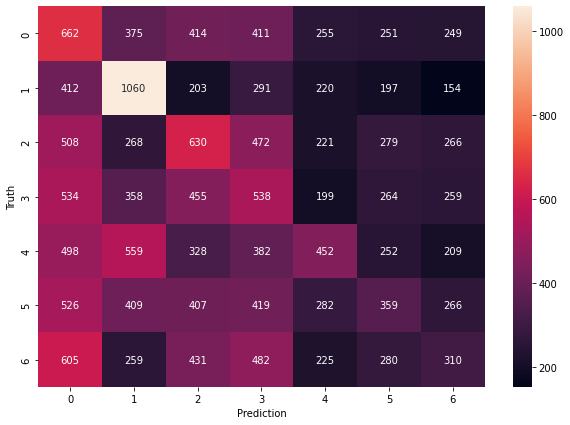

In [179]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [194]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.22      0.15      0.18      2617
           2       0.41      0.48      0.44      2537
           3       0.27      0.39      0.32      2644
           4       0.25      0.28      0.26      2607
           5       0.28      0.32      0.30      2680
           6       0.21      0.12      0.16      2668
           7       0.23      0.21      0.22      2592

    accuracy                           0.28     18345
   macro avg       0.27      0.28      0.27     18345
weighted avg       0.27      0.28      0.27     18345



Text(69.0, 0.5, 'Truth')

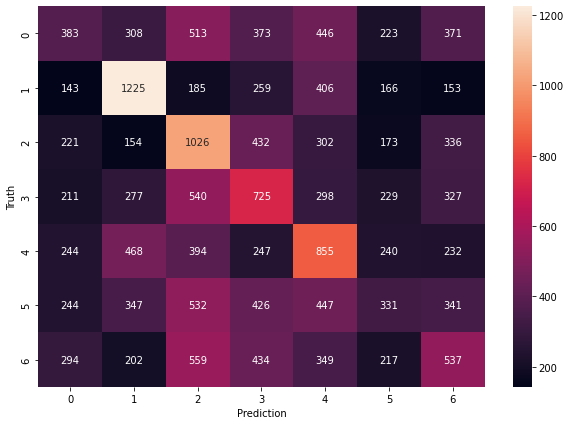

In [195]:
#finally print the confusion matrix for the best model (GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')